## Step 1 - Load and Inspect the Dataset

In [22]:
#imports
from sklearn.datasets import load_iris
import pandas as pd

#load the dataset(returns an object)
iris = load_iris()
#We split features(X-flower measurements) and labels(y-species id)
X, y = iris.data, iris.target

#Build a table to inspect the data
df = pd.DataFrame(X, columns=iris.feature_names)
#add a new column for the species_id
df["species_id"] = y
#this method will convert the above y IDs to target_names(readable names)
df["species"] = pd.Categorical.from_codes(y, iris.target_names)

#Output check
print("shape:", df.shape)
display(df.head())
print("species counts:\n", df["species"].value_counts())

shape: (150, 6)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species_id,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


species counts:
 species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


- df refers to DataFrame in Pandas and refers to a two dimensional table with rows and columns.
- were using a Dataframe bucause its easy to manipulate data with and its a more cleaner way to view the data

## Step 2 - Split Train/Test

- The goal here is to train and test and the same data to chek if the model memorises answers.
- We will do this by splitting the sampels into an 80/20 split a Training set and a Test set

In [24]:
#Imports
from sklearn.model_selection import train_test_split
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,       # 20 % goes to test (30 flowers)
    random_state=42,      # random seed; same shuffle each run
    stratify=y 
    # stratify ensures each species stays balanced in
    #both sets even after splitting so there is not bias between different species
)

print("X_train:", X_train.shape, "y_train:", y_train.shape)
print("X_test: ", X_test.shape,  "y_test: ", y_test.shape)
print("train class counts:", np.bincount(y_train))
print("test  class counts:", np.bincount(y_test))

X_train: (120, 4) y_train: (120,)
X_test:  (30, 4) y_test:  (30,)
train class counts: [40 40 40]
test  class counts: [10 10 10]


## Step 3 - Training using Decision Tree Classifier




- This is where we are actually teaching the model from the training data


In [36]:
from sklearn.tree import DecisionTreeClassifier

# initialize the model with scikit-learn package
#random_state is used to ensure simiral results/splits every run 
model = DecisionTreeClassifier(random_state = 42, max_depth=3)

#.fit() to train the model on the training data 
# X_train=all the training flowers & y_train=all their correct species
model.fit(X_train, y_train)

print('Model trained!')

Model trained!


# Step 4 - Making Predictions, Testing & Evaluating themodel

Predictions: [0 2 1 1 0 1 0 0 2 1 2 2 2 1 0]
True Labels: [0 2 1 1 0 1 0 0 2 1 2 2 2 1 0]
Accuracy: 0.9666666666666667


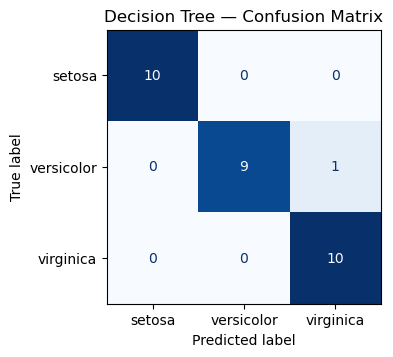

In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

#we use the . predict method to test the model on the unseen data
y_pred = model.predict(X_test)

#comparing the accuracy of predictions(the models results) to true labels
print("Predictions:", y_pred[:15])
print("True Labels:", y_test[:15])

#check for accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# 3) confusion matrix (see which classes get mixed up)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=iris.target_names)

fig, ax = plt.subplots(figsize=(4,4))
disp.plot(ax=ax, cmap="Blues", colorbar=False)
plt.title("Decision Tree — Confusion Matrix")
plt.tight_layout()
plt.show()